### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

# **[Data Exploration]** Let's examine the content of the dataframe and explore any missing data:

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.shape

(12684, 26)

# We can see that this dataframe has 12,684 rows and 26 columns.

# Now let's explore the possible attributes of the different key categories:

In [8]:
data["destination"].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [9]:
data["coupon"].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [10]:
data["maritalStatus"].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [11]:
data["weather"].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [12]:
data["temperature"].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [47]:
data["occupation"].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [49]:
data["Bar"].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [51]:
data["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

# Check for any null data:

In [53]:
null_check = data.isnull().any()
print(null_check)

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool


# Discovered that 6 of the categories contain null / blank data.

# Now let's check how many missing entries exist per each category.

In [55]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

# Interesting to see that the "car" category had mostly blank data (12,576 out of total 12,684 rows)

3. Decide what to do about your missing data -- drop, replace, other...

# Let's drop the "car" column since almost all of its data is blank

In [59]:
data_sans_car = data.drop("car", axis=1)
data_sans_car.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

# Now let's replace all null data with "N/A" to create a more human-readable output:

In [290]:
data_populate_NA = data_sans_car.fillna("N/A")

# Verify we no longer have null data:

In [62]:
data_populate_NA.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# We can see that all data is populate with no null entries.

# For simplicity, rename the updated dataframe to "dataN":

In [65]:
dataN = data_populate_NA

4. What proportion of the total observations chose to accept the coupon?

In [450]:
proportion_accept_total = dataN["Y"].value_counts(normalize=True)[1]*100
print("Proportion of entries that accepted the coupon:", f"{proportion_accept_total:.2f}%")

Proportion of entries that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

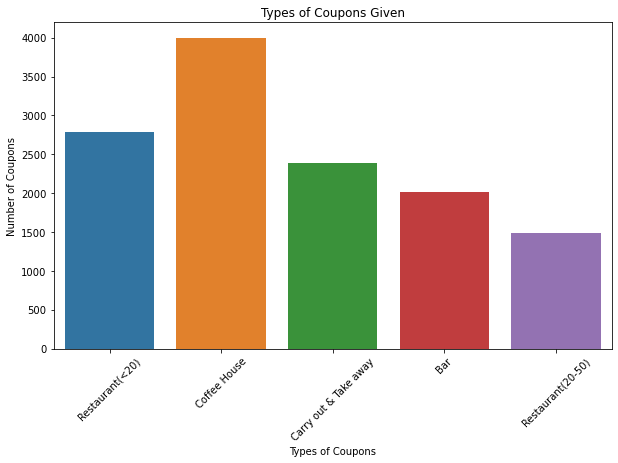

In [71]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Types of Coupons Given")
sns.countplot(data = dataN, x = "coupon")
plt.ylabel("Number of Coupons")
plt.xlabel("Types of Coupons")
plt.show()

# **Discovery** We can see that Coffee House makes up the most coupon type given, followed by cheap restaurants, carry out and bar, with expensive restaurants being the coupon type with the least number.

6. Use a histogram to visualize the temperature column.

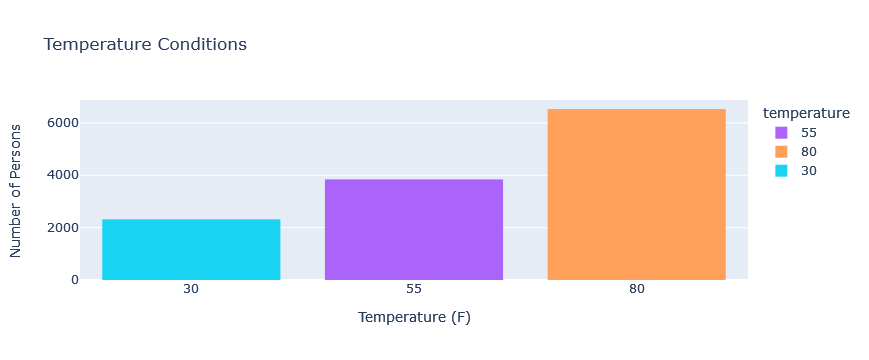

In [307]:
dataN_Consolidated = pd.cut(dataN["temperature"], bins=[0, 40, 60, float('inf')], labels=["30", "55" , "80"])
dataN_Consolidated_Sorted = px.histogram(dataN_Consolidated, x="temperature", color="temperature", title = "Temperature Conditions", category_orders={"temperature": sorted(dataN["temperature"])})
dataN_Consolidated_Sorted.update_xaxes(title_text = "Temperature (F)")
dataN_Consolidated_Sorted.update_yaxes(title_text = "Number of Persons")
dataN_Consolidated_Sorted.show()


# **Discovery** Most coupons were given out during warmer temperature (80F) conditions, followed by moderate (55F), with cooler temperature (30F) being the least.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [313]:
BarDF = dataN[dataN["coupon"] == "Bar"].copy()

2. What proportion of bar coupons were accepted?


In [440]:
proportion_accept_bar = BarDF["Y"].value_counts(normalize=True)[1]*100
print("Proportion of entries that accepted the bar coupon:", f"{proportion_accept_bar:.2f}%")

Proportion of entries that accepted the bar coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


# Let's compare the acceptance rate between those who went to a bar 3 or fewer times to those who went more:

# Let's first examine the BarDF data, starting with those who accepted the coupon

In [366]:
BarDF["Bar"].value_counts()

never    830
less1    570
1~3      397
4~8      150
gt8       49
N/A       21
Name: Bar, dtype: int64

# Now, let's check the Bar DF data, of those who accepted the coupon:

In [368]:
BarDF[BarDF["Y"] == 1]["Bar"].value_counts()

1~3      257
less1    253
never    156
4~8      117
gt8       36
N/A        8
Name: Bar, dtype: int64

# Determine the acceptance rate of those who went to a bar 3 or fewer times a month:

In [452]:
#proportion_accept_bar_less_than_3 = BarDF[BarDF["Bar"].isin(["never", "less1", "1~3"])]["Y"].value_counts(normalize=True)[1]
accept_rate_bar_less_than_3 = BarDF[BarDF["Y"] == 1]["Bar"].isin(["never", "less1", "1~3"]).value_counts() / BarDF["Bar"].isin(["never", "less1", "1~3"]).value_counts()*100
print("Acceptance rate of those who went to a bar 3 or fewer times a month:", f"{accept_rate_bar_less_than_3[True]:.2f}%")

Acceptance rate of those who went to a bar 3 or fewer times a month: 37.06%


# Similarly, now determine the acceptance rate of those who went to a bar more than 3 times a month:

In [454]:
accept_rate_bar_more_than_3 = BarDF[BarDF["Y"] == 1]["Bar"].isin(["4~8", "gt8"]).value_counts() / BarDF["Bar"].isin(["4~8", "gt8"]).value_counts()*100
print("Acceptance rate of those who went to a bar more than 3 times a month:", f"{accept_rate_bar_more_than_3[True]:.2f}%")

Acceptance rate of those who went to a bar more than 3 times a month: 76.88%


# **Discovery** 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


# Let's compare the acceptance rate between drivers who go to a bar more than once a month and are over age 25 vs others:

# First, let's examine the "Age" category of BarDF:

In [85]:
BarDF["age"].value_counts()

21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: age, dtype: int64

# Now, check the same as above but counting only those who accepted the coupon:

In [86]:
BarDF[BarDF["Y"] == 1]["age"].value_counts()

21         211
26         193
31         125
50plus      84
41          77
36          63
46          38
below21     36
Name: age, dtype: int64

# Determine the coupon acceptance rate of those who went to a bar more than once a month and over age 25:

In [456]:
accept_rate_bar_more_than_1_and_over_25 = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["age"].isin(["26", "31", "50plus", "41", "36", "46"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["age"].isin(["26", "31", "50plus", "41", "36", "46"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month and over age 25:", f"{accept_rate_bar_more_than_1_and_over_25:.2f}%")

Acceptance rate of those who went to a bar more than once a month and over age 25: 69.52%


# Determine the coupon acceptance rate of those who went to a bar once or less a month and over age 25:

In [458]:
accept_rate_bar_1_or_less_and_over_25 = BarDF[(BarDF["Bar"].isin(["less1", "never"])) & (BarDF["age"].isin(["26", "31", "50plus", "41", "36", "46"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["less1", "never"])) & (BarDF["age"].isin(["26", "31", "50plus", "41", "36", "46"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar once or less a month and over age 25:", f"{accept_rate_bar_1_or_less_and_over_25:.2f}%")

Acceptance rate of those who went to a bar once or less a month and over age 25: 26.10%


# Determine the coupon acceptance rate of those who went to a bar more than once a month and under age 25:

In [460]:
accept_rate_bar_more_than_1_and_under_25 = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["age"].isin(["21", "below21"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["age"].isin(["21", "below21"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month and under age 25:", f"{accept_rate_bar_more_than_1_and_under_25:.2f}%")

Acceptance rate of those who went to a bar more than once a month and under age 25: 67.05%


# Determine the coupon acceptance rate of those who went to a bar once or less a month and under age 25:

In [462]:
accept_rate_bar_1_or_less_and_under_25 = BarDF[(BarDF["Bar"].isin(["less1", "never"])) & (BarDF["age"].isin(["21", "below21"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["less1", "never"])) & (BarDF["age"].isin(["21", "below21"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar once or less a month and under age 25:", f"{accept_rate_bar_1_or_less_and_under_25:.2f}%")

Acceptance rate of those who went to a bar once or less a month and under age 25: 39.45%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


# Let's first examine the data in "passanger" (sic) column:

In [105]:
BarDF["passanger"].value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: int64

# Similarly, check out the "occupation" column:

In [107]:
BarDF["occupation"].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

# Determine the coupon acceptance rate of those who went to a bar more than once a month, had adult passengers and did not work in Farming, Fishing & Forestry:

In [464]:
accept_rate_bar_more_than_1_with_adult_pass = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Friend(s)", "Partner"])) & (~BarDF["occupation"].isin(["Farming Fishing & Forestry"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Friend(s)", "Partner"])) & (~BarDF["occupation"].isin(["Farming Fishing & Forestry"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry:", f"{accept_rate_bar_more_than_1_with_adult_pass:.2f}%")


Acceptance rate of those who went to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 71.79%


# Determine the coupon acceptance rate of those who went to a bar more than once a month, had kids as passengers and did not work in Farming, Fishing & Forestry:

In [466]:
accept_rate_bar_more_than_1_with_kids_pass = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Kid(s)"])) & (~BarDF["occupation"].isin(["Farming Fishing & Forestry"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Kid(s)"])) & (~BarDF["occupation"].isin(["Farming Fishing & Forestry"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month, had passengers that were kids, and had occupations other than farming, fishing, or forestry:", f"{accept_rate_bar_more_than_1_with_kids_pass:.2f}%")


Acceptance rate of those who went to a bar more than once a month, had passengers that were kids, and had occupations other than farming, fishing, or forestry: 37.78%


# Determine the coupon acceptance rate of those who went to a bar more than once a month, had no passengers and did not work in Farming, Fishing & Forestry:¶


In [468]:
accept_rate_bar_more_than_1_with_no_pass = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Alone"])) & (~BarDF["occupation"].isin(["Farming Fishing & Forestry"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Alone"])) & (~BarDF["occupation"].isin(["Farming Fishing & Forestry"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month, had no passengers, and had occupations other than farming, fishing, or forestry:", f"{accept_rate_bar_more_than_1_with_no_pass:.2f}%")


Acceptance rate of those who went to a bar more than once a month, had no passengers, and had occupations other than farming, fishing, or forestry: 71.07%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



# First, let's examine the Marital Status column:

In [116]:
BarDF["maritalStatus"].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

# Determine the coupon acceptance rate of those who went to a bar more than once a month, had adults as passengers and were not widowed:

In [476]:
accept_rate_bar_more_than_1_with_adult_pass_and_not_widowed = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Friend(s)", "Partner"])) & (~BarDF["maritalStatus"].isin(["Widowed"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["passanger"].isin(["Friend(s)", "Partner"])) & (~BarDF["maritalStatus"].isin(["Widowed"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month, had passengers that were not a kid, and were not widowed:", f"{accept_rate_bar_more_than_1_with_adult_pass_and_not_widowed:.2f}%")


Acceptance rate of those who went to a bar more than once a month, had passengers that were not a kid, and were not widowed: 71.79%


# Determine the coupon acceptance rate of those who went to a bar more than once a month and were under age 30:

In [472]:
accept_rate_bar_more_than_1_under_30 = BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["age"].isin(["21", "26", "below21"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["Bar"].isin(["1~3", "4~8", "gt8"])) & (BarDF["age"].isin(["21", "26", "below21"]))].value_counts().sum()*100
print("Acceptance rate of those who went to a bar more than once a month and were under 30:", f"{accept_rate_bar_more_than_1_under_30:.2f}%")


Acceptance rate of those who went to a bar more than once a month and were under 30: 72.17%


# Let's examine the data under the cheap restaurants "RestaurantLessThan20" column:

In [122]:
BarDF["RestaurantLessThan20"].value_counts()

1~3      878
4~8      568
less1    325
gt8      186
never     37
N/A       23
Name: RestaurantLessThan20, dtype: int64

# Similar to the above, now check out the data under the "income" column:

In [124]:
BarDF["income"].value_counts()

$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: income, dtype: int64

# Determine the coupon acceptance rate of those who went to cheap restaurants more than 4 times a month and had income less than 50K:


In [478]:
accept_rate_cheap_rest_4plus_income_50k_less = BarDF[(BarDF["RestaurantLessThan20"].isin(["4~8", "gt8"])) & (BarDF["income"].isin(["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"])) & (BarDF["Y"] == 1)].value_counts().sum() / BarDF[(BarDF["RestaurantLessThan20"].isin(["4~8", "gt8"])) & (BarDF["income"].isin(["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"]))].value_counts().sum()*100
print("Acceptance rate of those who went to cheap restaurants > 4 times a month with income < 50K:", f"{accept_rate_cheap_rest_4plus_income_50k_less:.2f}%")


Acceptance rate of those who went to cheap restaurants > 4 times a month with income < 50K: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# I chose the Carryout & Takeaway coupon group for this exercise.

# Create a new DataFrame that contains just the Carryout & Takeaway coupons, named "carryDF":

In [132]:
carryDF = dataN[dataN["coupon"] == "Carry out & Take away"].copy()

# Next, let's examine the carryDF dataframe:

In [136]:
carryDF.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2393.000000,2393.000000,2393.0,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,58.290848,0.428751,1.0,0.635186,0.110740,0.331383,0.668617,0.735478
std,21.538928,0.495001,0.0,0.481479,0.313875,0.470809,0.470809,0.441170
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Let's first explore if and how weather plays a part in influencing people's coupon acceptance behavior, using a Seaborn countplot:

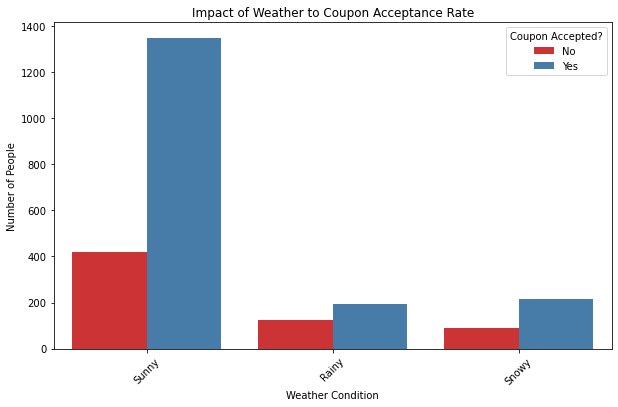

In [138]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Impact of Weather to Coupon Acceptance Rate")
sns.countplot(data = carryDF, x = "weather", hue = "Y", palette = "Set1")
plt.xlabel("Weather Condition")
plt.ylabel("Number of People")
plt.legend(title = "Coupon Accepted?", labels = ["No", "Yes"])
plt.show()

# From the bar plot, it appears that Sunny weather has a strong influence towards people's Carryout & Takeaway coupon acceptance rate.  However, it's not clear what the actual acceptance to refusal ratio is.

# Let's determine the acceptance to refusal ratio for each weather category:

In [140]:
ratio_list = carryDF.groupby(["weather", "Y"]).size().unstack(fill_value=0)
ratio_list["ratio"] = ratio_list[1] / ratio_list[0]
print(ratio_list)

Y          0     1     ratio
weather                     
Rainy    124   195  1.572581
Snowy     90   217  2.411111
Sunny    419  1348  3.217184


# Leverage Seaborn barplot to illustrate the acceptance to refusal ratio for each of the 3 weather categories:

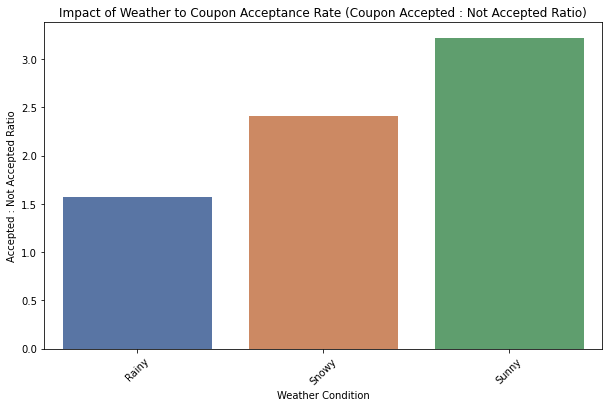

In [160]:
plt.figure(figsize=(10, 6))
sns.barplot(data = ratio_list, y = "ratio", x = ratio_list.index, palette = "deep")
plt.ylabel("Accepted : Not Accepted Ratio")
plt.xlabel("Weather Condition")
plt.title("Impact of Weather to Coupon Acceptance Rate (Coupon Accepted : Not Accepted Ratio)")
plt.xticks(rotation=45)
plt.show()

# Here we can definitively see that Sunny weather has the strongest influence to coupon acceptance rate, followed by Snowy and Rainy weather.

# Next, let's first explore if and how the driving destination plays a part in influencing people's coupon acceptance behavior, using a Seaborn countplot:

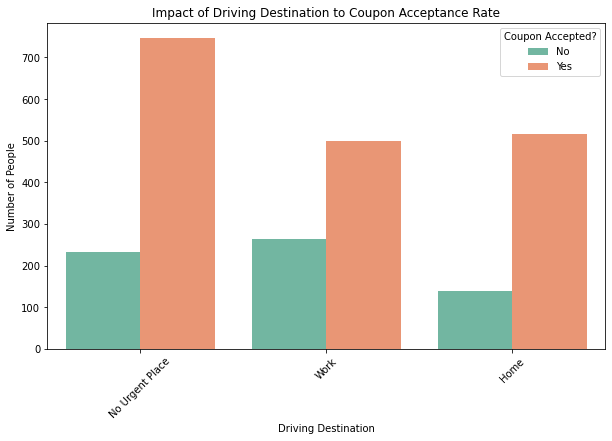

In [144]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Impact of Driving Destination to Coupon Acceptance Rate")
sns.countplot(data = carryDF, x = "destination", hue = "Y", palette = "Set2")
plt.xlabel("Driving Destination")
plt.ylabel("Number of People")
plt.legend(title = "Coupon Accepted?", labels = ["No", "Yes"])
plt.show()

# It appears that home and no urgent place have the strongest factors to people's coupon acceptance rate, followed by work.

# Now, let's map out the coupon acceptance to rejection ratio:

In [146]:
ratio_list2 = carryDF.groupby(["destination", "Y"]).size().unstack(fill_value=0)
ratio_list2["ratio"] = ratio_list2[1] / ratio_list2[0]
print(ratio_list2)

Y                  0    1     ratio
destination                        
Home             138  515  3.731884
No Urgent Place  232  746  3.215517
Work             263  499  1.897338


# Use Seaborn barplot to illustrate the acceptance to refusal ratio for each of the 3 destination categories:

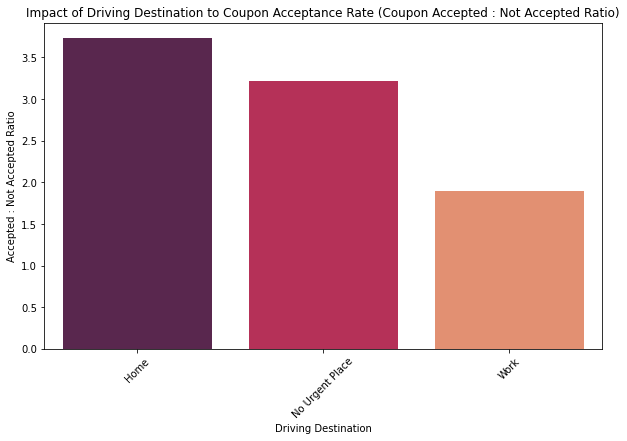

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(data = ratio_list2, y = "ratio", x = ratio_list2.index, palette = "rocket")
plt.ylabel("Accepted : Not Accepted Ratio")
plt.xlabel("Driving Destination")
plt.title("Impact of Driving Destination to Coupon Acceptance Rate (Coupon Accepted : Not Accepted Ratio)")
plt.xticks(rotation=45)
plt.show()

# Here we can clearly see that the home as the driving destination has the strongest acceptance ratio over no urgent place and work.

# Let's explore if and how gender plays a part in influencing people's coupon acceptance behavior, using a Seaborn countplot:

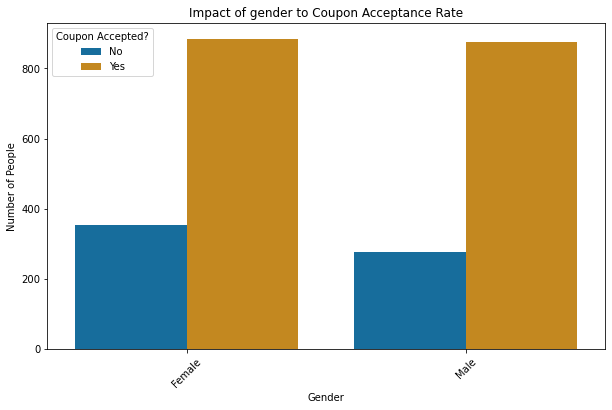

In [254]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Impact of gender to Coupon Acceptance Rate")
sns.countplot(data = carryDF, x = "gender", hue = "Y", palette = "colorblind")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title = "Coupon Accepted?", labels = ["No", "Yes"])
plt.show()

# From the plot, both female and male genders have relatively similar coupon acceptance rate and acceptance-to-rejection ratio.  So I concluded that gender does not play a notable role of the coupon acceptance rate.

# Let's check to see if and how coupon expiration plays a part in influencing people's coupon acceptance behavior, using a Seaborn countplot:

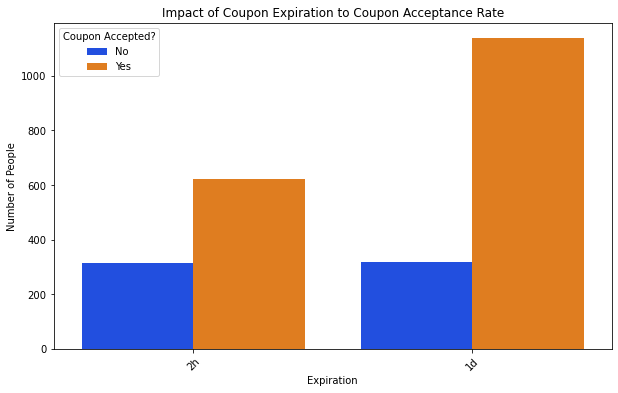

In [150]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Impact of Coupon Expiration to Coupon Acceptance Rate")
sns.countplot(data = carryDF, x = "expiration", hue = "Y", palette = "bright")
plt.xlabel("Expiration")
plt.ylabel("Number of People")
plt.legend(title = "Coupon Accepted?", labels = ["No", "Yes"])
plt.show()

# From the plot, we can see that the longer expiration of 1-day has a much higher acceptance rate than that of a 2-hour expiration.

# Now, let's map out the coupon acceptance to rejection ratio:

In [152]:
ratio_list3 = carryDF.groupby(["expiration", "Y"]).size().unstack(fill_value=0)
ratio_list3["ratio"] = ratio_list3[1] / ratio_list3[0]
print(ratio_list3)

Y             0     1     ratio
expiration                     
1d          318  1138  3.578616
2h          315   622  1.974603


# Use Seaborn barplot to illustrate the acceptance to refusal ratio for both of the expiration categories:

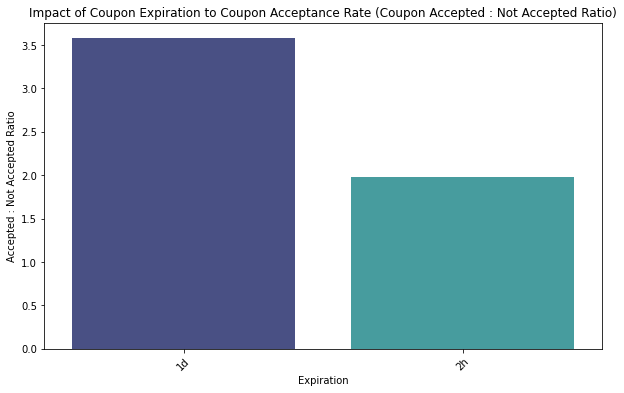

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(data = ratio_list3, y = "ratio", x = ratio_list3.index, palette = "mako")
plt.ylabel("Accepted : Not Accepted Ratio")
plt.xlabel("Expiration")
plt.title("Impact of Coupon Expiration to Coupon Acceptance Rate (Coupon Accepted : Not Accepted Ratio)")
plt.xticks(rotation=45)
plt.show()

# Here we clearly see that the 1-day coupon expiration has a higher acceptance ratio than the 2-hour counterpart.

# Let's explore if and how time of day plays a part in influencing people's coupon acceptance behavior, using a Seaborn countplot:

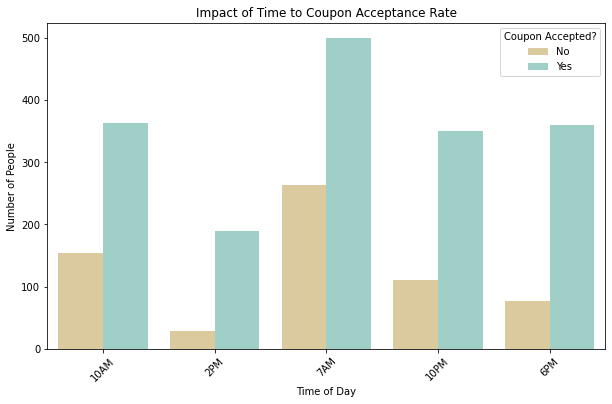

In [182]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Impact of Time to Coupon Acceptance Rate")
sns.countplot(data = carryDF, x = "time", hue = "Y", palette = "BrBG")
plt.xlabel("Time of Day")
plt.ylabel("Number of People")
plt.legend(title = "Coupon Accepted?", labels = ["No", "Yes"])
plt.show()

# At a glance, we can see that 2pm and 6pm appear to have the highest coupon acceptance ratio.

# Next, let's determine the coupon acceptance to rejection ratio:

In [184]:
ratio_list4 = carryDF.groupby(["time", "Y"]).size().unstack(fill_value=0)
ratio_list4["ratio"] = ratio_list4[1] / ratio_list4[0]
print(ratio_list4)

Y       0    1     ratio
time                    
10AM  154  363  2.357143
10PM  111  350  3.153153
2PM    29  189  6.517241
6PM    76  359  4.723684
7AM   263  499  1.897338


# Use Seaborn barplot to illustrate the acceptance to refusal ratio for all of the time of day categories:

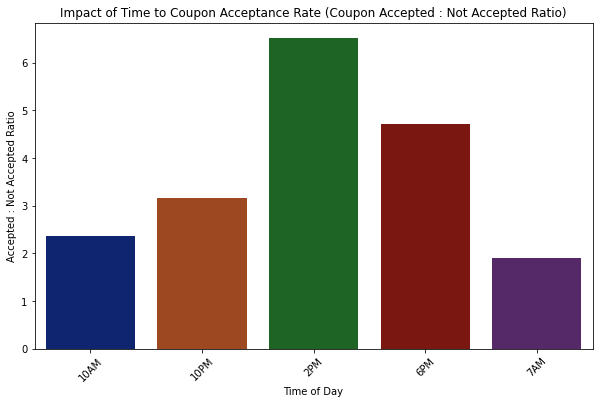

In [192]:
plt.figure(figsize=(10, 6))
sns.barplot(data = ratio_list4, y = "ratio", x = ratio_list4.index, palette = "dark")
plt.ylabel("Accepted : Not Accepted Ratio")
plt.xlabel("Time of Day")
plt.title("Impact of Time to Coupon Acceptance Rate (Coupon Accepted : Not Accepted Ratio)")
plt.xticks(rotation=45)
plt.show()

# From the graph, we can confirm that 2pm has the highest coupon acceptance ratio and 7am has the lowest.

# Finally, let's check to see if and how any passenger(s) plays a part in influencing people's coupon acceptance behavior, using a Seaborn countplot:

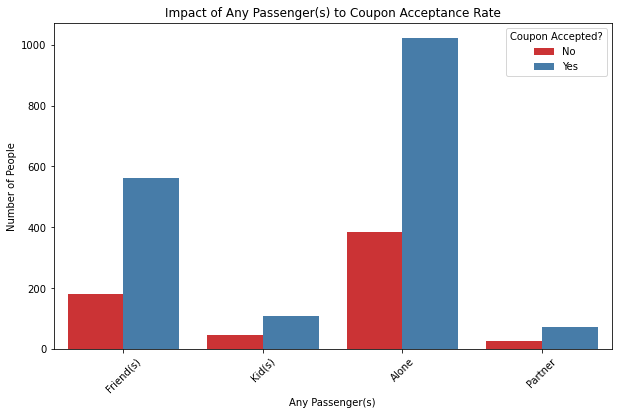

In [206]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Impact of Any Passenger(s) to Coupon Acceptance Rate")
sns.countplot(data = carryDF, x = "passanger", hue = "Y", palette = "Set1")
plt.xlabel("Any Passenger(s)")
plt.ylabel("Number of People")
plt.legend(title = "Coupon Accepted?", labels = ["No", "Yes"])
plt.show()

# From the graph, it appears driving with friend(s) has the strongest coupon acceptance rate.

# Next, let's determine the coupon acceptance to rejection ratio:

In [202]:
ratio_list5 = carryDF.groupby(["passanger", "Y"]).size().unstack(fill_value=0)
ratio_list5["ratio"] = ratio_list5[1] / ratio_list5[0]
print(ratio_list5)

Y            0     1     ratio
passanger                     
Alone      383  1022  2.668407
Friend(s)  179   560  3.128492
Kid(s)      45   107  2.377778
Partner     26    71  2.730769


# Use Seaborn barplot to illustrate the acceptance to refusal ratio for all of the time of day categories:

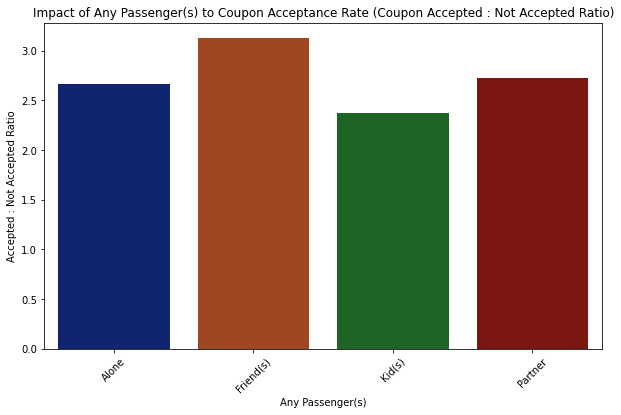

In [210]:
plt.figure(figsize=(10, 6))
sns.barplot(data = ratio_list5, y = "ratio", x = ratio_list5.index, palette = "dark")
plt.ylabel("Accepted : Not Accepted Ratio")
plt.xlabel("Any Passenger(s)")
plt.title("Impact of Any Passenger(s) to Coupon Acceptance Rate (Coupon Accepted : Not Accepted Ratio)")
plt.xticks(rotation=45)
plt.show()

# From the plot, we can confirm that driving with friend(s) has the highest propensity of accepting a coupon.  In contrast, driving with kid(s) has the lowest acceptance ratio.